# Classification Algorithms in Python.ipynb

+ Data Science Practicum for Business with Python
+ Wayne State University
+ Casey Whorton
+ 3.24.2020

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Import the MNIST dataset from sklearn and output CSVs**

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
mnist_data = pd.DataFrame(mnist.data.reshape(70000,784))
mnist_target = pd.DataFrame(mnist.target)

In [195]:
mnist_data.to_csv('C:/Users/casey/OneDrive/Desktop/mnist_data.csv')
mnist_target.to_csv('C:/Users/casey/OneDrive/Desktop/mnist_target.csv')

# A quick note on Training, Validation, and Testing Datasets

+ When creating machine learning models, some algorithms have the tendency to learn from the data very well
    + In fact, they learn a little too well from the examples they are given, and return predictions very well only for the data they learned from
    + They don't perform well on new data
    + We call this phenomena _overfitting_ and we have have to be careful not to do it here
+ We want models that _generalize_ well to new data so we can use them in practice
    + A great way to determine how well a model will generalize is to calculate performance measures, like the MSE we talked about last week, on a set of data the model has not seen before
        + We'll call this test data
    + While training the model, we can further split our training dataset into training data and validation data and do much the same thing: calculate a performance metric on the data _not_ used in training
        + We'll call this validation data
    + Of course, the data we use to train the model is called training data

There is a lot of literature on the best ways to split data, but generally we want a majority of our data for training and a minority for validation and test data....as long as the amount of test data is meaningful.

Our regression models used all of the training data and we attributed a performance metric based on training data...this might be good for a first look but not good enough for real world practice

If we had 10000 observations in our dataset, we might split it like this:
+ 70000: training data
+ 20000: validation data
+ 10000: testing data

Or maybe, use cross validation within our training data
+ 80000: training data
+ 20000: testing data




**To Do**
+ Execute the next two pieces of code
+ Notice that we are reducing our data and splitting it up into _training_ and _testing_ datasets

In [196]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [197]:
X_train = X[0:100]
y_train = y[0:100]
X_test = X[101:201]
y_test = y[101:201]

# MNIST data - Take a look

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

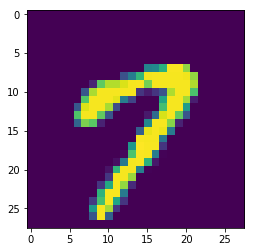

In [199]:
mynumber = X_train[15]
mynumber_img = mynumber.reshape(28,28)
plt.imshow(mynumber_img)
plt.show()

# Binary Classification using Logistic Regression
+ This is the algorithm with the cost function we looked at in the slide-deck

In [200]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# splitting into 7s and not 7s

y7_train = (y_train=='7')
y7_test = (y_test == '7')

log_reg.fit(X_train,y7_train)

C:\Users\casey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [201]:
# classes that the model recognizes (False and True for 7s)
log_reg.classes_

array([False,  True])

In [202]:
# predict_proba predicts the probability that a number belongs to one of the classes in 'classes_'
log_reg.predict_proba([mynumber])

array([[3.44700666e-05, 9.99965530e-01]])

In [203]:
# predict will predict the class
log_reg.predict([mynumber])

array([ True])

**To do**
+ Check out this new number, the 90th number from our training data
+ Use the predict_proba method to predict the probability the number falls into class
+ Use the predict method to determine if it is a 7 or not

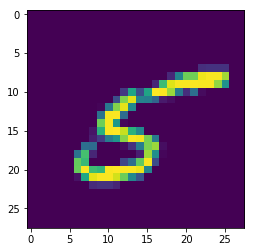

In [204]:
mynumber = X_test[90]
mynumber_img = mynumber.reshape(28,28)
plt.imshow(mynumber_img)
plt.show()

In [221]:
# Write your code here


In [222]:
# Write your code here


# Performance Measures

For regression we saw the MSE for a performance measure...we also saw the R-squared metric.

Here we will look at three performance measures for classification models:

+ Accuracy
+ Precision
+ Recall

Here is how we calculate them, which we'll do in a moment:

+ Accuracy := (True Positives + True Negatives)/Total
+ Precision := (True Positives)/(True Positives + False Positives)
+ Recall := (True Positives)/(True Positives + False Negatives)

In [164]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [207]:
# Run this code
# This shows the accuracy calculated using the logistic regression model

accuracy_score(y7_test,log_reg.predict(X_test))

0.96

In [208]:
# Similarly for precision

precision_score(y7_test,log_reg.predict(X_test))

0.8888888888888888

In [209]:
# Similarly for recall

recall_score(y7_test,log_reg.predict(X_test))

0.7272727272727273

# Cross Validation for our Binary Classifier

Remember we mentioned _cross validation_ earlier in the notebook?  Here, we are going to train a Logistic Regression model on folds of the training data and return a performance metric on the remaining portion.

In [210]:
from sklearn.model_selection import cross_val_score

In [211]:
# The CV argument is the number of cross validation folds we will use
# A cross validation fold is a fraction of the total training data, here we split it into 3
# We use 2 for training and 1 for validation...that way we evaluate the model on data is hasn't seen before

cross_val_score(log_reg, X_train, y7, cv=3, scoring='accuracy')

C:\Users\casey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\casey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\casey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.94117647, 0.91176471, 0.96875   ])

In [170]:
# Do it again for precision)
cross_val_score(log_reg, X_train, y7, cv=3, scoring='precision')

C:\Users\casey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\casey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\casey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.75      , 0.66666667, 1.        ])

**To do**
+ Run the cross_val_score function on the log_reg model, but use the 'recall' as the scoring function

In [227]:
# Write your code here


# Confusion Matrix for Binary Classifier

+ Accuracy := (True Positives + True Negatives)/Total
+ Precision := (True Positives)/(True Positives + False Positives)
+ Recall := (True Positives)/(True Positives + False Negatives)

In [172]:
from sklearn.metrics import confusion_matrix

In [212]:
# Run this code

pd.DataFrame(confusion_matrix(y7_test, log_reg.predict(X_test)), index = ['Actual False','Actual True'],
            columns = ['Predicted False', 'Predicted True'])

,Predicted False,Predicted True
Actual False,88,1
Actual True,3,8


In [213]:
# Using the formula, we will calculat the accuracy of the model

accuracy = (88 + 8)/100
print(accuracy)

0.96


In [214]:
# compare this with the accuracy score returned from the sklearn metrics function for accuracy_score

accuracy_score(y7_test, log_reg.predict(X_test))

0.96

**To do**
+ Calculate the precision using the confusion matrix above
+ Calculate the precision using the precision_score function from sklearn
+ Calculate the recall using the confusion matrix above
+ Calculate the recall using the recall_score function from sklearn

In [224]:
# Write your code here

In [224]:
# Write your code here

In [225]:
# Write your code here

In [225]:
# Write your code here

# Multiclass Classification using RandomForest Classifier

+ We aren't limited to classifying two things, but we can classify multiple things
+ Specifically, place an observation into 1 of K buckets
+ We'll use a RandomForestClassifier in this section
    + We'll discuss trees next week

In [215]:
from sklearn.ensemble import RandomForestClassifier
rtree = RandomForestClassifier()
rtree.fit(X_train,y_train)

C:\Users\casey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

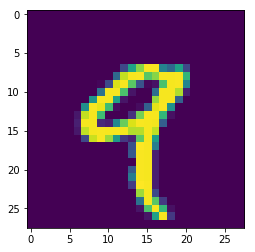

['9']


In [216]:
mynumber = X_train[4]
mynumber_img = mynumber.reshape(28,28)
plt.imshow(mynumber_img)
plt.show()
print(rtree.predict([mynumber]))

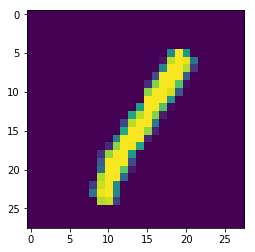

['1']


In [217]:
mynumber = X_train[23]
mynumber_img = mynumber.reshape(28,28)
plt.imshow(mynumber_img)
plt.show()
print(rtree.predict([mynumber]))

**To Do**
+ Use the predict_proba to show the probabilities that this observations falls into a certain class
+ Which are the highest but which are also represented?
+ Do the same with another observation

In [226]:
# Write your code here

# Confusion Matrix for Multiclass Classification

In [190]:
confusion_matrix(y_test, rtree.predict(X_test))

array([[ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  3,  8,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  1,  6,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  1,  0,  4,  0,  0,  0,  0,  4],
       [ 0,  2,  0,  2,  0,  3,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  6,  0,  0,  1],
       [ 1,  2,  0,  0,  1,  0,  0,  7,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0,  0,  2,  2],
       [ 0,  0,  0,  0,  4,  0,  0,  2,  0,  6]], dtype=int64)

How helpful is this?

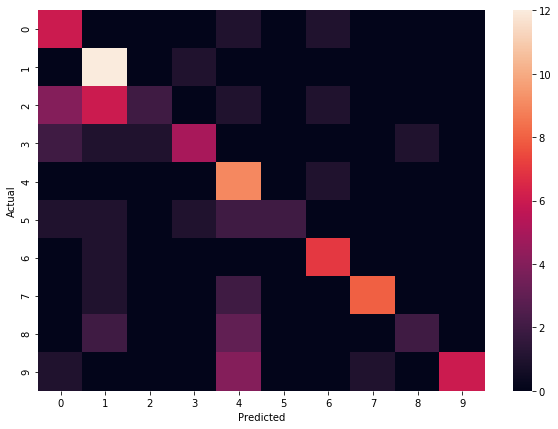

In [219]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, rtree.predict(X_test)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**To Do**
+ Look at the heatmap above
+ Notice what the numbers in the diagonal represent - the instances where the classification/prediction is the same as the actual
+ How often do we predict a 4 when it is actually a 0?
+ How often do we predicted a 7 when it is actually a 9?
+ Run the code below

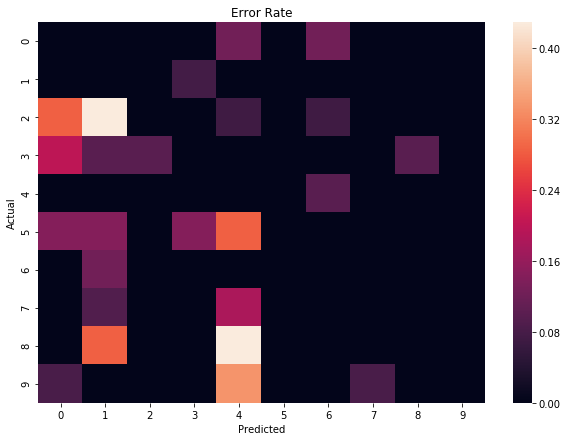

In [220]:
cmat = confusion_matrix(y_test, rtree.predict(X_test))
plt.figure(figsize=(10,7))
rs = (cmat).sum(axis=1, keepdims=True)
norm_cmat = cmat/rs
np.fill_diagonal(norm_cmat,0)
sns.heatmap(norm_cmat)
plt.title('Error Rate')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**To do**
+ After looking at the error rate - what numbers are misclassified the most?
+ Is there any reason why they would be missclassified more often?

# Homework
+ Use the nameplate or trim level information in the datasci practicum data set for the project as a multiclass target
+ Go to https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and look at the comparison of classifiers
+ Create a multi-class classification model to predict what the nameplate or trim of the vehicle is
    + Choose a different classifier than the ones chosen in class today
    + Use the MSRP of the vehicle as well as other features from the dataset as well as others you or your team-mates have created
+ Which nameplates are missclassified as what other nameplates and why?
+ Show your performance metrics
    + Which is more important for your project?
        + Accuracy?
        + Precision?
        + Recall?
+ Put your work in this notebook, rename it by adding your name, upload it to your Github, and let me know

# End